In [1]:
from IPython.display import display, HTML, Markdown
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("""<style>
div.CodeMirror, div.CodeMirror pre, div.CodeMirror-code,
div.output_area pre, div.output_wrapper pre,
.text_cell_render, .text_cell_render *
{ font-family: Consolas; font-size: 15pt; line-height: 140%;}
</style>"""))

# 제출 방법

1. 파일 이름에서 '이름'을 자신의 이름으로 고쳐서 제출하시오.
2. 제출 후 파일을 삭제하시오.

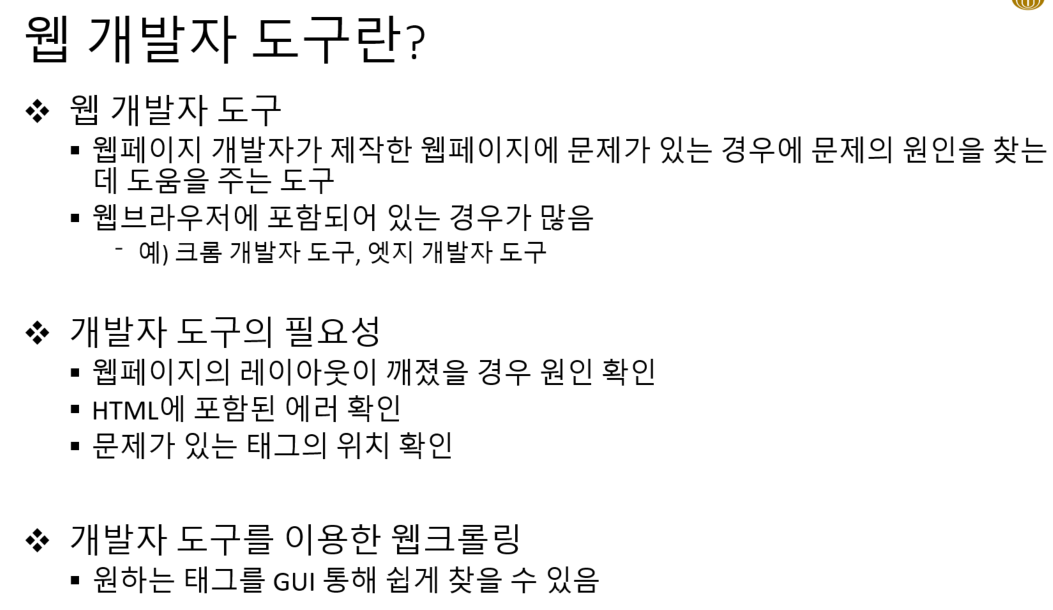

# 문제1

크롤링을 이용하여 아래 사이트에서 제품 설명(Description)에서 강조되어 이는 문구들만 아래와 같이 출력하시오.

https://www.pythonscraping.com/pages/page3.html

***결과***
```
Now with super-colorful bell peppers!
8 entire dolls per set! Octuple the presents!
Also hand-painted by trained monkeys!
Or maybe he's only resting?
Keep your friends guessing!
```


In [6]:
import requests as rq
from bs4 import BeautifulSoup

url = "https://www.pythonscraping.com/pages/page3.html"
res = rq.get(url)
soup = BeautifulSoup(res.text, 'lxml')

tags = soup.find_all("span", class_="excitingNote")
for tag in tags:
    print(tag.text.strip())

Now with super-colorful bell peppers!
8 entire dolls per set! Octuple the presents!
Also hand-painted by trained monkeys!
Or maybe he's only resting?
Keep your friends guessing!


# 문제2
아래 사이트에서 시가총액 Top10 회사들의 이름을 아래와 같이 출력하시오.

http://finance.naver.com/sise/

***출력결과***
```
===시가총액 Top10===
1위: 삼성전자
2위: SK하이닉스
3위: LG화학
4위: 삼성전자우
5위: NAVER
6위: 삼성바이오로직스
7위: 카카오
8위: 현대차
9위: 삼성SDI
10위: 셀트리온
```

In [5]:
from bs4 import BeautifulSoup
import requests as rq

url = "http://finance.naver.com/sise/"
res = rq.get(url)
soup = BeautifulSoup(res.text, "lxml")

print("===시가총액 Top10===")
tags = soup.find(id="siselist_tab_7").find_all("a")
for i, v in enumerate(tags, 1):
    print(f"{i}위: {v.text}")


===시가총액 Top10===
1위: 삼성전자
2위: LG에너지솔루션
3위: SK하이닉스
4위: 삼성바이오로직스
5위: 삼성전자우
6위: LG화학
7위: 삼성SDI
8위: 현대차
9위: 기아
10위: POSCO홀딩스


# 문제3

아래 사이트에서 기사의 등록시간과 제목을 아래와 같은 형식으로 5개만 출력하시오.

https://entertain.naver.com/movie

***출력***
```
[1분전] 설재원 쿨투라 편집장, 韓 최초 '골든글로브' 투표단 참여
[4분전] '존 윅 4', 압도적인 스코어로 주말 박스오피스 1위
[5분전] 한국 넘어 세계 관객 울린다…글로벌 스트리밍 입성, 뮤지컬 ‘친정엄마’
[5분전] 뮤지컬 ‘베토벤’ 세종문화회관 첫 공연도 성료
[8분전] '존 윅 4', 개봉 첫 주 72만 관객 돌파…5일 연속 박스오피스 1위
```

In [7]:
import requests as rq
from bs4 import BeautifulSoup

url = "https://entertain.naver.com/movie"
res = rq.get(url)
soup = BeautifulSoup(res.text, 'lxml')

tags = soup.find_all("div", class_="tit_area", limit=5)
for tag in tags:
    time=tag.find("em").text
    title = tag.find("a").text
    print(f"[{time}] {title}")


[1분전] '바비' 마고 로비 "韓 팬들 생일 축하에 눈물 날 뻔했다"[Oh!쎈 현장]
[1분전] 마고 로비 “바비 인형 대신 진흙탕에서 놀던 아이였다”(바비)
[1분전] '바비' 마고 로비 "한국 팬들의 깜짝 생일 축하에 눈물날 뻔"
[1분전] 마고 로비 첫 내한 "한국에서 생일 맞아…감동적이었다"[SE★현장]
[1분전] '바비' 마고 로비 "韓에서 맞은 생일, 눈물 났다"
